- The user describes what kind of beer she is looking for. 
- E.g. “I want a low-alcoholic beer, with fruity notes. And gluten free”

- The API returns the top-N beers that fit into the requirements.

## EDA

- **What pieces of information can we use to describe a beer?** We may use the 'type' which is a value that I added to my df based on 'style' column. We may also take into account 'Fruits,Body,Sweet,Sour,bitter'. Those values have a poor correlation with the rating but they got the highest correlations and they are widly used to describe a beer too

- **What entries should be dropped because of missing data?** There are only 2 rows with missing values and these are less than 1% of our dataset so we may delete them.

- **Distribution of key features: geo, alcohol level…**

- The most popular beers in our dataset are Lager,Stout,IPA.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [95]:
##### Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Inline plotting
%matplotlib inline

In [2]:
import seaborn as sns

In [4]:
df=pd.read_csv('C:/Users/Yooel/Desktop/beer_recommender/data/beer_data_set.csv')
df.head(1)

,Name,key,Style,Style Key,Brewery,Description,ABV,Ave Rating,Min IBU,Max IBU,...,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,Amber,251,Altbier,8,Alaskan Brewing Co.,"Notes:Richly malty and long on the palate, with just enough hop backing to make this beautiful amber colored ""alt"" style beer notably well balanced.\t",5.3,3.65,25,50,...,32,9,47,74,33,0,33,57,8,111


In [5]:
unique_values=df.select_dtypes(include='number').nunique().sort_values()

<AxesSubplot:title={'center':'Unique Values per Columns'}>

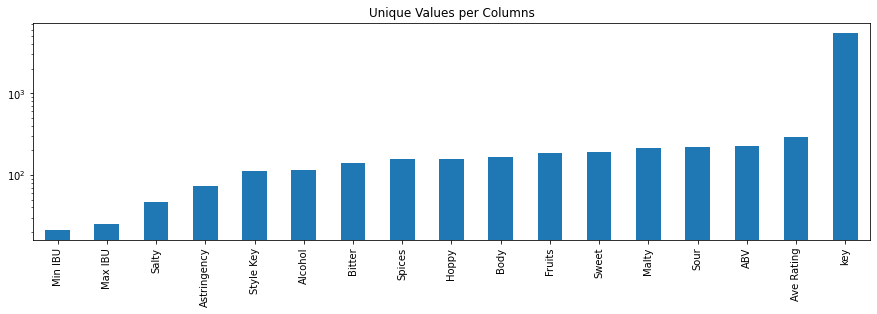

In [6]:
unique_values.plot.bar(logy=True,figsize=(15,4),title='Unique Values per Columns')

In [19]:
n_duplicates=df.drop(labels=['key'],axis=1).duplicated().sum()
print(f"We have {n_duplicates} duplicate values")

We have 0 duplicate values


In [7]:
df.isnull().sum()

Name           2
key            0
Style          0
Style Key      0
Brewery        0
Description    0
ABV            0
Ave Rating     0
Min IBU        0
Max IBU        0
Astringency    0
Body           0
Alcohol        0
Bitter         0
Sweet          0
Sour           0
Salty          0
Fruits         0
Hoppy          0
Spices         0
Malty          0
dtype: int64

In [8]:
#These are the entries that should be dropped due to missing values

df[df['Name'].isnull()]

,Name,key,Style,Style Key,Brewery,Description,ABV,Ave Rating,Min IBU,Max IBU,...,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
1803,NaN,3504,Kvass,81,Monastyrskiy Kvas,Notes:,1.5,3.07,0,0,...,34,4,15,84,16,1,33,14,7,68
2150,NaN,2401,Lager - European Pale,57,Stella Artois,Notes:,5.0,3.11,18,25,...,14,10,20,19,3,0,1,26,3,26


In [161]:
df['type']=(df['Style'].str.split('-',expand=True))[[0]]
df.head(1)

,Name,key,Style,Style Key,Brewery,Description,ABV,Ave Rating,Min IBU,Max IBU,...,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,type
0,Amber,251,Altbier,8,Alaskan Brewing Co.,"Notes:Richly malty and long on the palate, with just enough hop backing to make this beautiful amber colored ""alt"" style beer notably well balanced.\t",5.3,3.65,25,50,...,9,47,74,33,0,33,57,8,111,Altbier


In [26]:
#Missing values are less than 1% so it's ok.
len(df[df['Name'].isnull()])/len(df)

0.0003598416696653472

In [10]:
categorical_values=list(df.select_dtypes(include='object').columns)

In [11]:
for x in categorical_values:
    print(x)
    print(df[x].unique())
    print(df[x].nunique())
    print()
    print()

Name
['Amber' 'Double Bag' 'Long Trail Ale' ... 'Fish Tale Winterfish'
 "He'Brew Hanukkah, Chanukah: Pass The Beer"
 'Frosted Frog Christmas Ale - Barrel-Aged']
5317


Style
['Altbier' 'Barleywine - American' 'Barleywine - English'
 'Bitter - English Extra Special / Strong Bitter (ESB)' 'Bitter - English'
 'Bière de Champagne / Bière Brut' 'Blonde Ale - American'
 'Blonde Ale - Belgian' 'Bock - Doppelbock' 'Bock - Eisbock'
 'Bock - Maibock' 'Bock - Traditional' 'Bock - Weizenbock' 'Braggot'
 'Brett Beer' 'Brown Ale - American' 'Brown Ale - Belgian Dark'
 'Brown Ale - English' 'California Common / Steam Beer' 'Chile Beer'
 'Cream Ale' 'Dubbel' 'Farmhouse Ale - Bière de Garde'
 'Farmhouse Ale - Sahti' 'Farmhouse Ale - Saison' 'Fruit and Field Beer'
 'Gruit / Ancient Herbed Ale' 'Happoshu' 'Herb and Spice Beer'
 'IPA - American' 'IPA - Belgian' 'IPA - Black / Cascadian Dark Ale'
 'IPA - Brut' 'IPA - English' 'IPA - Imperial' 'IPA - New England' 'Kvass'
 'Kölsch' 'Lager - Adjunct' 'Lager -

In [21]:
numerical_values=list(df.select_dtypes(include='number').columns)

In [41]:
#The 3 most popular type of beer in our dataset are Lager,Stout,IPA.

df['type'].value_counts(normalize=True)

Lager                              0.161929
Stout                              0.071968
IPA                                0.062972
Wheat Beer                         0.062972
Porter                             0.053976
Bock                               0.044980
Strong Ale                         0.035984
Sour                               0.035264
Lambic                             0.029327
Pale Ale                           0.026988
Farmhouse Ale                      0.026988
Brown Ale                          0.026988
Red Ale                            0.026988
Pilsner                            0.026988
Bitter                             0.017992
Barleywine                         0.017992
Mild Ale                           0.017992
Blonde Ale                         0.017992
Kölsch                             0.008996
Herb and Spice Beer                0.008996
Gruit / Ancient Herbed Ale         0.008996
Quadrupel (Quad)                   0.008996
Scotch Ale / Wee Heavy          

<AxesSubplot:xlabel='Ave Rating', ylabel='Count'>

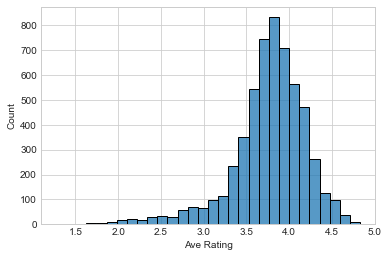

In [120]:
sns.histplot(df['Ave Rating'],bins=30)

<AxesSubplot:xlabel='Alcohol', ylabel='Count'>

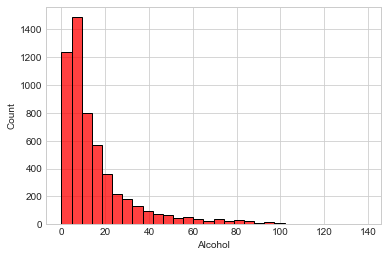

In [151]:
sns.histplot(df['Alcohol'],color='red',bins=30)

<AxesSubplot:xlabel='Fruits', ylabel='Count'>

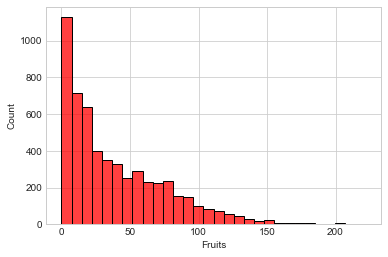

In [153]:
sns.histplot(df['Fruits'],color='red',bins=30)

<AxesSubplot:xlabel='Body', ylabel='Count'>

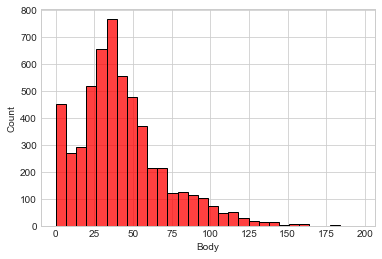

In [154]:
sns.histplot(df['Body'],color='red',bins=30)

<AxesSubplot:xlabel='Sweet', ylabel='Count'>

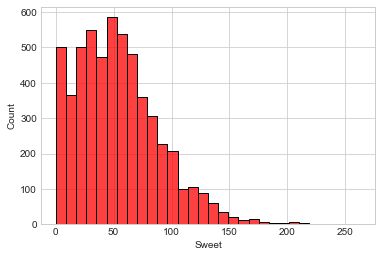

In [155]:
sns.histplot(df['Sweet'],color='red',bins=30)

<AxesSubplot:xlabel='Sour', ylabel='Count'>

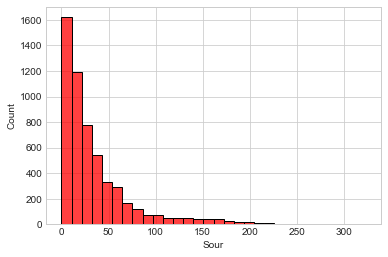

In [156]:
sns.histplot(df['Sour'],color='red',bins=30)

<AxesSubplot:>

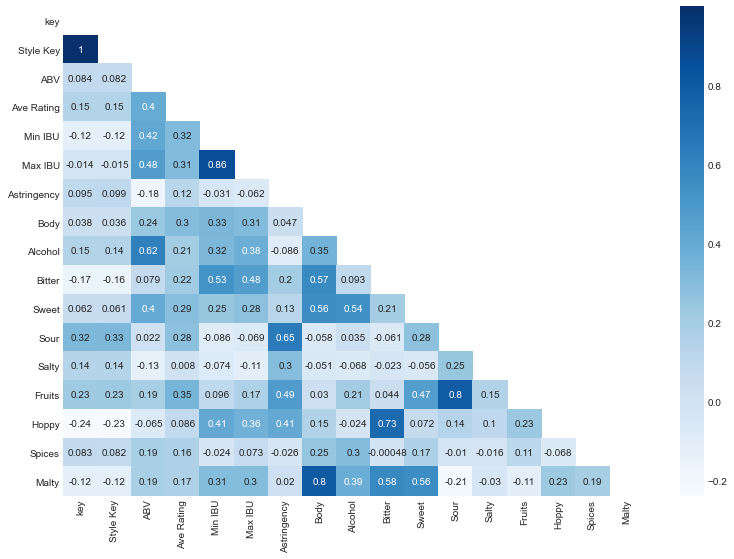

In [107]:
plt.figure(figsize=(13, 9))

corr = df[numerical_values].corr()
matrix = np.triu(corr)
sns.heatmap(corr, cmap="Blues", annot=True,mask=matrix)

In [141]:
#ABV->Alcohol by Volume
#Poor correlation between the ranking and other features

corr['Ave Rating'].sort_values(ascending=False)

Ave Rating     1.000000
ABV            0.397886
Fruits         0.346845
Min IBU        0.316693
Max IBU        0.309347
Body           0.304012
Sweet          0.291256
Sour           0.280917
Bitter         0.217807
Alcohol        0.206772
Malty          0.166673
Spices         0.163894
Style Key      0.147485
key            0.147239
Astringency    0.123156
Hoppy          0.086045
Salty          0.008001
Name: Ave Rating, dtype: float64